In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [46]:
data = pd.read_csv(r'YOURPATH\survey lung cancer.csv')

In [47]:
# Display the first few rows for a quick overview
print(data.head())

# Statistical summary of the dataset
print(data.describe())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      

In [48]:
# EDA
sns.set_style("whitegrid")
plt.figure(figsize=(18, 5))

<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Age')

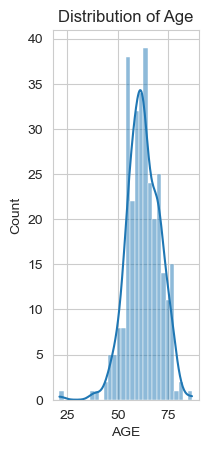

In [49]:
# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(data=data, x="AGE", kde=True, bins=30)
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Distribution of Gender')

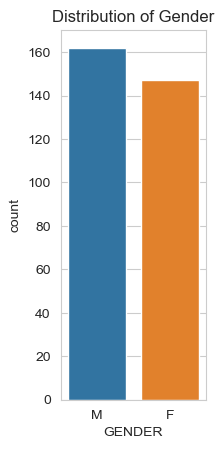

In [50]:
# Gender Distribution
plt.subplot(1, 3, 2)
sns.countplot(data=data, x="GENDER")
plt.title('Distribution of Gender')

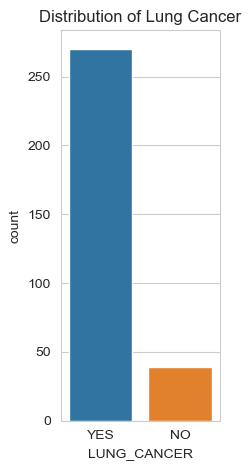

In [51]:
# Lung Cancer Distribution
plt.subplot(1, 3, 3)
sns.countplot(data=data, x="LUNG_CANCER")
plt.title('Distribution of Lung Cancer')
plt.tight_layout()
plt.show()

In [52]:
# Preprocessing
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Predictive Modeling
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [55]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC-AUC: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333
ROC-AUC: 0.7416666666666667
Confusion Matrix:
[[ 1  1]
 [ 1 59]]


In [56]:
# Feature Importance
feature_importance = pd.DataFrame(model.coef_[0], index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print(feature_importance)

                       Importance
FATIGUE                  1.481533
ALCOHOL CONSUMING        1.352938
SWALLOWING DIFFICULTY    1.335448
CHRONIC DISEASE          1.279374
COUGHING                 1.239569
ALLERGY                  1.214883
YELLOW_FINGERS           1.047323
PEER_PRESSURE            0.967504
SMOKING                  0.740343
ANXIETY                  0.697378
WHEEZING                 0.625013
CHEST PAIN               0.571563
SHORTNESS OF BREATH      0.126897
AGE                      0.024566
GENDER                  -0.183276


In [57]:
# Data Preprocessing
# Encoding categorical variables
le = LabelEncoder()
data['GENDER'] = le.fit_transform(data['GENDER'])
data['LUNG_CANCER'] = le.fit_transform(data['LUNG_CANCER'])

In [58]:

# Splitting the dataset into features and target variable
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [59]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictive Modeling with Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [60]:
# Making predictions
y_pred = model.predict(X_test)

In [61]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 1  1]
 [ 1 59]]


In [62]:
# Re-initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [63]:
# Parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [64]:
# Initialize the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [65]:
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [66]:
# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8946938775510203


In [67]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
# Initialize Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f'CV Accuracy: {cv_scores.mean()} ± {cv_scores.std()}')

CV Accuracy: 0.8866122448979592 ± 0.03506823241360681


In [69]:
# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8946938775510203


In [70]:
# Predict on test data
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)

# Evaluation metrics
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')

Accuracy: 0.967741935483871
Precision: 0.9833333333333333
Recall: 0.9833333333333333


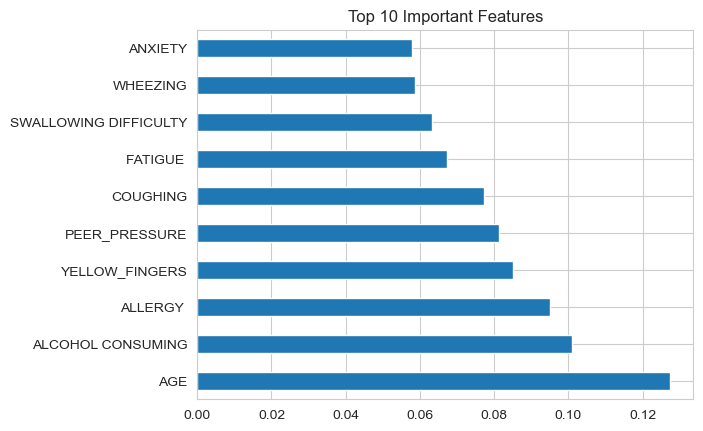

In [71]:
feature_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()